In [85]:
import pandas as pd
import seaborn as sns
from sklearn.metrics import f1_score, accuracy_score
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import metrics
from collections import Counter
from scipy import stats

# Data Cleaning and Exploration

In [86]:
df = pd.read_csv("denn_bawl_german.txt",  sep= ',', header= 0)

In [87]:
df.shape

(1958, 13)

In [88]:
df.head()

,WORD,Val,Val_sd,joy,joy_sd,anger,anger_sd,sadness,sadness_sd,fear,fear_sd,disgust,disgust_sd
0,abart,"-1,6","0,6992059","1,4762","0,98076744","1,7143","1,0556","1,7143","1,1019","1,8095","0,9284","2,4762","1,3645"
1,abbau,-1,"1,1697953","1,25","0,7163504","2,4","1,1425","2,35","1,2258","2,3","1,4179","1,5","0,8272"
2,abbild,"-0,2","0,63245553","1,8636","1,03718734","1,4545","1,0108","1,2273","0,5284","1,3636","0,9021","1,3182","0,9455"
3,abbruch,"-0,7","1,15950181","1,1","0,30779351","2,55","1,3169","1,7","0,9234","2,15","1,268","1,2","0,6959"
4,abdruck,"-0,1","0,31622777","1,4","0,75393703","1,2","0,5231","1,1","0,4472",1,0,1,0


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   WORD        1958 non-null   object
 1   Val         1958 non-null   object
 2   Val_sd      1958 non-null   object
 3   joy         1958 non-null   object
 4   joy_sd      1958 non-null   object
 5   anger       1958 non-null   object
 6   anger_sd    1958 non-null   object
 7   sadness     1958 non-null   object
 8   sadness_sd  1958 non-null   object
 9   fear        1958 non-null   object
 10  fear_sd     1958 non-null   object
 11  disgust     1958 non-null   object
 12  disgust_sd  1958 non-null   object
dtypes: object(13)
memory usage: 199.0+ KB


In [90]:
df = df.apply(lambda x: x.str.replace(',','.'))
cols = df.columns.drop("WORD")
df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [91]:
corrMatrix = df[['Val', 'joy', 'anger', 'sadness', 'fear', 'disgust']].corr()
corrMatrix

,Val,joy,anger,sadness,fear,disgust
Val,1.000000,0.839311,-0.718214,-0.497845,-0.636182,-0.445439
joy,0.839311,1.000000,-0.516796,-0.269514,-0.417055,-0.333224
anger,-0.718214,-0.516796,1.000000,0.555835,0.616946,0.356450
sadness,-0.497845,-0.269514,0.555835,1.000000,0.698792,0.305165
fear,-0.636182,-0.417055,0.616946,0.698792,1.000000,0.394672
disgust,-0.445439,-0.333224,0.356450,0.305165,0.394672,1.000000


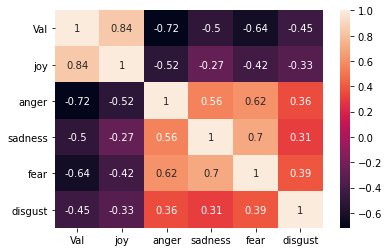

In [92]:
sns.heatmap(corrMatrix, annot=True)
plt.show()

# SentiArt



In [93]:
TC = "120kSentiArt_DE.xlsx"
sa = pd.read_excel(TC)
sa.head()

,word,wordLC,AAPz,ang_z,fear_z,disg_z,hap_z,sad_z,surp_z
0,Aachen,aachen,0.6557,0.097,-1.0980,-1.2940,-0.4470,-1.3020,-0.6360
1,Aal,aal,0.3076,0.234,-0.4620,1.4168,-0.1940,0.1161,-0.3240
2,Aale,aale,0.0619,0.218,-0.1440,0.4773,-0.1210,-0.1830,0.0135
3,Aas,aas,-1.0440,0.258,0.1618,2.0333,0.3128,0.3957,-0.8440
4,Aasfresser,aasfresser,-1.5150,0.327,1.1859,1.9843,0.2766,0.6850,0.5720


# The Hit Rate of SentiArt of SentiArt (92.594 %)



In [94]:
senti_words = []
for word in sa.wordLC:
    senti_words.append(word)

my_words = []
for word in df.WORD:
    my_words.append(word)
    
senti_match = []
for word in my_words:
    if word in senti_words:
        senti_match.append(word)
        
print(len(senti_words))
print(len(my_words))
print(len(senti_match))

116313
1958
1813


In [95]:
print("The hit rate of SentiArt = ", round(len(senti_match)*100/len(my_words),3), "%")

The hit rate of SentiArt =  92.594 %


In [96]:
AAPz = []
ang_z = []
fear_z = []
disg_z = []
joy_z = []
sad_z = []

In [97]:
for word in my_words:
    dt = sa.query("wordLC in @word")
    AAPz.append(dt.AAPz.mean())  
    ang_z.append(dt.ang_z.mean())
    fear_z.append(dt.fear_z.mean())
    disg_z.append(dt.disg_z.mean())
    joy_z.append(dt.hap_z.mean())
    sad_z.append(dt.sad_z.mean())

In [98]:
df["AAPz"] = AAPz
df["ang_z"] = ang_z 
df["fear_z"] = fear_z
df["disg_z"] = disg_z
df["joy_z"] = joy_z
df["sad_z"] = sad_z 

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   WORD        1958 non-null   object 
 1   Val         1958 non-null   float64
 2   Val_sd      1958 non-null   float64
 3   joy         1958 non-null   float64
 4   joy_sd      1958 non-null   float64
 5   anger       1958 non-null   float64
 6   anger_sd    1958 non-null   float64
 7   sadness     1958 non-null   float64
 8   sadness_sd  1958 non-null   float64
 9   fear        1958 non-null   float64
 10  fear_sd     1958 non-null   float64
 11  disgust     1958 non-null   float64
 12  disgust_sd  1958 non-null   float64
 13  AAPz        1813 non-null   float64
 14  ang_z       1813 non-null   float64
 15  fear_z      1813 non-null   float64
 16  disg_z      1813 non-null   float64
 17  joy_z       1813 non-null   float64
 18  sad_z       1813 non-null   float64
dtypes: float64(18), object(1)
m

In [100]:
df.sad_z.isna().sum() # Datapoints are not in SentiArt

145

In [101]:
df_NOM = df.dropna()
df_NOM.shape

(1813, 19)

In [102]:
corrMatrix_s = df_NOM[["AAPz", "joy_z", "ang_z", "sad_z", "fear_z", "disg_z"]].corr()
corrMatrix_s

,AAPz,joy_z,ang_z,sad_z,fear_z,disg_z
AAPz,1.000000,0.149601,-0.504832,-0.178178,-0.554675,-0.424151
joy_z,0.149601,1.000000,0.615969,0.768651,0.569995,0.576303
ang_z,-0.504832,0.615969,1.000000,0.812230,0.868054,0.788444
sad_z,-0.178178,0.768651,0.812230,1.000000,0.768101,0.790655
fear_z,-0.554675,0.569995,0.868054,0.768101,1.000000,0.739085
disg_z,-0.424151,0.576303,0.788444,0.790655,0.739085,1.000000


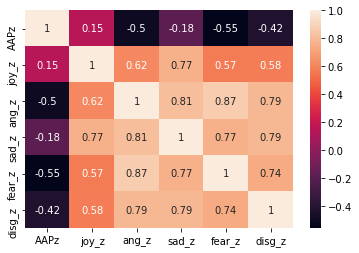

In [103]:
sns.heatmap(corrMatrix_s, annot=True)
plt.show()

# Regression Analysis

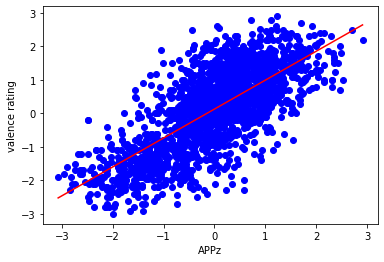

Gradient =  0.864
R-squared=  0.725
p_value=  0.0
std_err=  0.019


In [104]:
x = df_NOM["AAPz"]
y = df_NOM["Val"]
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1 = gradient*x1 + intercept
plt.plot(x,y,'ob')
plt.plot(x1, y1,'-r')
plt.xlabel("APPz")
plt.ylabel("valence rating")
plt.show()
print("Gradient = ", round(gradient, 3))
print("R-squared= ", round(r_value, 3))
print("p_value= ", round(p_value, 3))
print("std_err= ", round(std_err, 3))

# Converting the data into three categories  

In [105]:
df_categories = pd.DataFrame()

In [106]:
df_categories["Val"] = pd.cut(df_NOM["Val"], bins = 3, labels=[1, 2, 3])
df_categories["joy"] = pd.cut(df_NOM["joy"], bins = 3, labels=[1, 2, 3])
df_categories["anger"] = pd.cut(df_NOM["anger"], bins = 3, labels=[1, 2, 3])
df_categories["sadness"] = pd.cut(df_NOM["sadness"], bins = 3, labels=[1, 2, 3])
df_categories["fear"] = pd.cut(df_NOM["fear"], bins = 3, labels=[1, 2, 3])
df_categories["disgust"] = pd.cut(df_NOM["disgust"], bins = 3, labels=[1, 2, 3])
df_categories["AAPz"] = pd.cut(df_NOM["AAPz"], bins = 3, labels=[1, 2, 3])
df_categories["ang_z"] = pd.cut(df_NOM["ang_z"], bins = 3, labels=[1, 2, 3])
df_categories["fear_z"] = pd.cut(df_NOM["fear_z"], bins = 3, labels=[1, 2, 3])
df_categories["disg_z"] = pd.cut(df_NOM["disg_z"], bins = 3, labels=[1, 2, 3])
df_categories["joy_z"] = pd.cut(df_NOM["joy_z"], bins = 3, labels=[1, 2, 3])
df_categories["sad_z"] = pd.cut(df_NOM["sad_z"], bins = 3, labels=[1, 2, 3])

# Evaluating the performance of SentiArt

# The Valence

f1_macro : 0.641
accuracy: 66.189 %


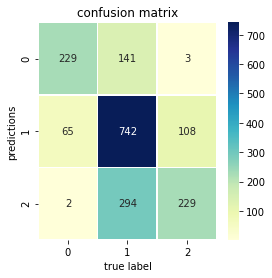

In [107]:
f1_macro = f1_score(df_categories["Val"], df_categories["AAPz"], average="macro")
acc = accuracy_score(df_categories["Val"], df_categories["AAPz"])*100
print("f1_macro :", round(f1_macro, 3))
print("accuracy:", round(acc,3), "%")
confusion_matrix = metrics.confusion_matrix(df_categories["Val"], df_categories["AAPz"])
f,ax = plt.subplots(figsize=(4,4))
sns.heatmap(confusion_matrix, annot=True, linewidths=.5, fmt= "d",ax=ax, cmap="YlGnBu");
plt.title("confusion matrix")
plt.xlabel("true label");
plt.ylabel("predictions");

# The discrete emotions

In [108]:
f1_macro = f1_score(df_categories["joy"], df_categories["joy_z"], average="macro")
acc = accuracy_score(df_categories["joy"], df_categories["joy_z"])*100
print("f1_macro :", round(f1_macro, 3))
print("accuracy:", round(acc,3), "%")

f1_macro : 0.317
accuracy: 59.901 %


In [109]:
f1_macro = f1_score(df_categories["anger"], df_categories["ang_z"], average="macro")
acc = accuracy_score(df_categories["anger"], df_categories["ang_z"])*100
print("f1_macro :", round(f1_macro, 3))
print("accuracy:", round(acc,3), "%")

f1_macro : 0.449
accuracy: 68.064 %


In [110]:
f1_macro = f1_score(df_categories["sadness"], df_categories["sad_z"], average="macro")
acc = accuracy_score(df_categories["sadness"], df_categories["sad_z"])*100
print("f1_macro :", round(f1_macro, 3))
print("accuracy:", round(acc,3), "%")

f1_macro : 0.265
accuracy: 37.121 %


In [111]:
f1_macro = f1_score(df_categories["fear"], df_categories["fear_z"], average="macro")
acc = accuracy_score(df_categories["fear"], df_categories["fear_z"])*100
print("f1_macro :", round(f1_macro, 3))
print("accuracy:", round(acc,3), "%")

f1_macro : 0.415
accuracy: 73.469 %


In [112]:
f1_macro = f1_score(df_categories["disgust"], df_categories["disg_z"], average="macro")
acc = accuracy_score(df_categories["disgust"], df_categories["disg_z"])*100
print("f1_macro :", round(f1_macro, 3))
print("accuracy:", round(acc,3), "%")

f1_macro : 0.382
accuracy: 70.877 %


# Evaluating the performance of SentiArt: The Polarity

The neutral words in Denn_BAWL have scores between -0.5 and 0.5 

The neutral words according to APPz in SentiArt have scores between -0.05 and 0.05

In [113]:
polarity = pd.DataFrame()
polarity["true"] = np.where((df_NOM["Val"] <= - 0.5), -1, np.where((df_NOM["Val"] >= 0.5), 1, 0))
polarity["predicted"] = np.where((df_NOM["AAPz"] <= - 0.05), -1, np.where((df_NOM["AAPz"] >= 0.05), 1, 0))

In [114]:
polarity["true"].value_counts()

 1    794
-1    562
 0    457
Name: true, dtype: int64

In [115]:
polarity["predicted"].value_counts()

 1    924
-1    812
 0     77
Name: predicted, dtype: int64

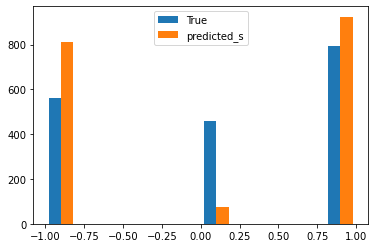

In [116]:
plt.hist([polarity.true, polarity.predicted], label=["True", "predicted_s"])
plt.legend(loc= "upper center")
plt.show()

f1_macro : 0.51
accuracy: 62.438 %


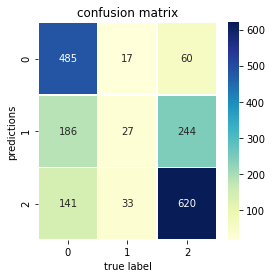

In [117]:
f1_macro = f1_score(polarity["true"], polarity["predicted"], average="macro")
acc = accuracy_score(polarity["true"], polarity["predicted"])*100
print("f1_macro :", round(f1_macro, 3))
print("accuracy:", round(acc,3), "%")
confusion_matrix = metrics.confusion_matrix(polarity["true"], polarity["predicted"])
f,ax = plt.subplots(figsize=(4,4))
sns.heatmap(confusion_matrix, annot=True, linewidths=.5, fmt= "d",ax=ax, cmap="YlGnBu");
plt.title("confusion matrix")
plt.xlabel("true label");
plt.ylabel("predictions");

# Words that have highest joy score

In [118]:
joy_t = df_NOM.nlargest(10, "joy")
joy_t["WORD"]

1561       sonne
1026        meer
1560      sommer
497     freizeit
925        liebe
502      frieden
499       freund
995         mama
1570        spaß
445       ferien
Name: WORD, dtype: object

In [119]:
joy_p = df_NOM.nlargest(10, "joy_z") #spaß (common), trauer, wehmut, ungeduld!
joy_p["WORD"]

498       freude
1570        spaß
967         lust
1898       wonne
1860      wehmut
712        jubel
1751    ungeduld
671     hoffnung
1157     neugier
1703      trauer
Name: WORD, dtype: object

# Words that have highest fear score

In [120]:
fear_t = df_NOM.nlargest(10, "fear")
fear_t["WORD"]

1727       tumor
837        krieg
582      giftgas
881       lawine
65      alptraum
127      atemnot
256        bombe
1665      terror
1417        ruin
1693        tote
Name: WORD, dtype: object

In [121]:
fear_p = df_NOM.nlargest(10, "fear_z")
fear_p["WORD"]

86         angst
515       furcht
1209       panik
1450       scham
24       abscheu
1180    ohnmacht
1490     schreck
1564      sorgen
377         ekel
1703      trauer
Name: WORD, dtype: object

In [122]:
df_NOM[df_NOM["WORD"] =="trauer"]

,WORD,Val,Val_sd,joy,joy_sd,anger,anger_sd,sadness,sadness_sd,fear,fear_sd,disgust,disgust_sd,AAPz,ang_z,fear_z,disg_z,joy_z,sad_z
1703,trauer,-2.1,0.967906,1.05,0.223607,1.75,0.9105,3.75,1.4824,2.35,1.3485,1.1,0.3078,-0.675,0.675,4.3877,3.0217,4.2802,4.9861


# EMOLEX

In [123]:
file =  "NRC-Emotion-Lexicon-v0.92-In105Languages-Nov2017Translations.xlsx"
emo = pd.read_excel(file)
emo.head()

,English (en),Afrikaans (af),Albanian (sq),Amharic (am),Arabic (ar),Armenian (hy),Azeerbaijani (az),Basque (eu),Belarusian (be),Bengali (bn),...,Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,aback,uit die veld geslaan,prapa,ተጭኗል,الى الوراء,շեղում,sanki,aback,ззаду,পশ্চাতে,...,0,0,0,0,0,0,0,0,0,0
1,abacus,abakus,numërator,abacus,طبلية تاج,անբավարարություն,abacus,abako,абака,গণনা-যন্ত্রবিশেষ,...,0,0,0,0,0,0,0,0,0,1
2,abandon,verlaat,braktis,ውጣ,تخلى,լքել,tərk et,bertan behera,адмовіцца ад,বর্জিত করা,...,0,1,0,0,0,1,0,1,0,0
3,abandoned,verlate,braktisur,ተትቷል,مهجور,լքված,tərk etdi,abandonatutako,закінуты,পরিত্যক্ত,...,0,1,1,0,0,1,0,1,0,0
4,abandonment,verlating,braktisje,ማቋረጥ,التخلي عن,հրաժարվելով,ləğv,abandono,пакіданне,বিসর্জন,...,0,1,1,0,0,1,0,1,1,0


In [124]:
emo = emo[["German (de)", "Positive", "Negative"]]
emo = emo.rename(columns={"German (de)":"de"})

In [125]:
emo.head()

,de,Positive,Negative
0,zurück,0,0
1,Abakus,0,0
2,verlassen,0,1
3,verlassen,0,1
4,Aufgabe,0,1


# The Hit Rate (0.46 %, 9 words)

In [126]:
emo_words = []
for word in emo["de"]:
    emo_words.append(word)
print(len(emo_words))

14182


In [127]:
match_emo = []
for word in my_words:
    if word in emo_words:
        match_emo.append(word)
print(len(match_emo))

9


In [128]:
match_emo

['delikt',
 'fest',
 'fett',
 'schroff',
 'stolz',
 'trotz',
 'wagen',
 'wert',
 'wolle']

In [129]:
print("The hit rate of EmoLex = ", round(len(match_emo)*100/len(my_words),3), "%")

The hit rate of EmoLex =  0.46 %


In [130]:
emo_polarity = []
for word in my_words:
    dt = emo.query("de in @word")
    if dt.Positive.mean() == 1:
        emo_polarity.append(1)
    elif dt.Negative.mean() == 1:
        emo_polarity.append(-1)
    elif dt.Negative.mean() == 0 and dt.Positive.mean() == 0:
        emo_polarity.append(0)   
    else:
        emo_polarity.append("NAN")

print("len(emo_polarity) =", len(emo_polarity))
print(Counter(emo_polarity))

len(emo_polarity) = 1958
Counter({'NAN': 1949, 0: 4, -1: 3, 1: 2})
